In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")


In [3]:
matches.columns


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [4]:
matches[matches['season'] == 2008].shape[0]

58

In [5]:
city_counts = matches['city'].value_counts()

city_counts.idxmax(), city_counts.max(), city_counts.idxmin(), city_counts.min()


('Mumbai', 85, 'Bloemfontein', 2)

In [6]:
matches['city'].value_counts()


,count
city,
Mumbai,85
Bangalore,66
Kolkata,61
Delhi,60
Hyderabad,49
Chennai,48
Chandigarh,46
Jaipur,33
Pune,32


In [7]:
matches.groupby('toss_winner')['toss_decision'].value_counts()


toss_winner                  toss_decision
Chennai Super Kings          bat              44
                             field            22
Deccan Chargers              bat              24
                             field            19
Delhi Daredevils             field            46
                             bat              26
Gujarat Lions                field            14
                             bat               1
Kings XI Punjab              field            43
                             bat              25
Kochi Tuskers Kerala         field             5
                             bat               3
Kolkata Knight Riders        field            48
                             bat              30
Mumbai Indians               field            45
                             bat              40
Pune Warriors                bat              11
                             field             9
Rajasthan Royals             field            35
                             bat              28
Rising Pune Supergiant       field             6
Rising Pune Supergiants      field             4
                             bat               3
Royal Challengers Bangalore  field            50
                             bat              20
Sunrisers Hyderabad          bat              18
                             field            17
Name: count, dtype: int64

In [8]:
matches['result'].value_counts()


,count
result,
normal,626
tie,7
no result,3


In [9]:
matches[matches['result'] == 'tie'][['team1', 'team2']]


,team1,team2
33,Gujarat Lions,Mumbai Indians
125,Rajasthan Royals,Kolkata Knight Riders
189,Kings XI Punjab,Chennai Super Kings
387,Royal Challengers Bangalore,Sunrisers Hyderabad
400,Delhi Daredevils,Royal Challengers Bangalore
475,Rajasthan Royals,Kolkata Knight Riders
535,Rajasthan Royals,Kings XI Punjab


In [10]:
matches[['winner', 'win_by_runs']].sort_values('win_by_runs', ascending=False).head(1), \
matches[matches['win_by_runs'] > 0].sort_values('win_by_runs').head(1)


(            winner  win_by_runs
 43  Mumbai Indians          146,
       id  season          city        date            team1            team2  \
 163  164    2009  Johannesburg  2009-05-17  Kings XI Punjab  Deccan Chargers   
 
          toss_winner toss_decision  result  dl_applied           winner  \
 163  Deccan Chargers         field  normal           0  Kings XI Punjab   
 
      win_by_runs  win_by_wickets player_of_match                  venue  \
 163            1               0    Yuvraj Singh  New Wanderers Stadium   
 
     umpire1    umpire2  umpire3  
 163  S Ravi  RB Tiffin      NaN  )

In [11]:
matches['win_by_runs'].describe()[['mean', '50%', 'std']]


,win_by_runs
mean,13.682390
50%,0.000000
std,23.908877


In [12]:
matches[['venue', 'win_by_runs']].sort_values('win_by_runs', ascending=False).head(1), \
matches[matches['win_by_runs'] > 0][['venue', 'win_by_runs']].sort_values('win_by_runs').head(1)


(               venue  win_by_runs
 43  Feroz Shah Kotla          146,
                      venue  win_by_runs
 163  New Wanderers Stadium            1)

In [13]:
matches['player_of_match'].value_counts()[lambda x: x > 3]


,count
player_of_match,
CH Gayle,18
YK Pathan,16
DA Warner,15
AB de Villiers,15
RG Sharma,14
SK Raina,14
MS Dhoni,13
G Gambhir,13
MEK Hussey,12


In [14]:
deliveries[deliveries['batsman_runs'] == 6]


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150395,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,10,2,V Kohli,CH Gayle,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150413,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,2,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150428,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,15,5,SR Watson,KL Rahul,MC Henriques,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150440,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,17,5,STR Binny,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [15]:
match_runs = deliveries.groupby('match_id')['total_runs'].sum().reset_index()



In [16]:
umpires = pd.concat([matches['umpire1'], matches['umpire2']])
umpires.value_counts().head(1)


,count
HDPK Dharmasena,87


In [17]:
matches['season'].value_counts().sort_index()


,count
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


In [18]:
match_runs = deliveries.groupby('match_id')['total_runs'].sum().reset_index()
match_runs = match_runs.merge(
    matches[['id', 'season', 'venue']],
    left_on='match_id',
    right_on='id'
)

match_runs.groupby('season')['total_runs'].sum()


,total_runs
season,
2008,17937
2009,16353
2010,18883
2011,21154
2012,22453
2013,22602
2014,18931
2015,18353
2016,18862


In [19]:
deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)


,batsman_runs
batsman,
SK Raina,4548
V Kohli,4423
RG Sharma,4207
G Gambhir,4132
DA Warner,4014
RV Uthappa,3778
CH Gayle,3651
S Dhawan,3561
MS Dhoni,3560


In [20]:
deliveries[deliveries['dismissal_kind'].notna()] \
.groupby('bowler')['dismissal_kind'].count() \
.sort_values(ascending=False)


,dismissal_kind
bowler,
SL Malinga,170
A Mishra,142
DJ Bravo,137
Harbhajan Singh,136
PP Chawla,133
...,...
SS Mundhe,1
SS Sarkar,1
Swapnil Singh,1


In [21]:
runs = deliveries.groupby('batsman')['batsman_runs'].sum()
outs = deliveries[deliveries['dismissal_kind'].notna()].groupby('player_dismissed').count()['dismissal_kind']

batting_avg = (runs / outs).dropna().sort_values(ascending=False).head(10)
batting_avg


,0
MN van Wyk,55.666667
V Shankar,50.500000
J Suchith,48.000000
AC Voges,45.250000
HM Amla,44.384615
Iqbal Abdulla,44.000000
CH Gayle,41.022472
PD Collingwood,40.600000
DA Warner,40.140000
LMP Simmons,39.962963


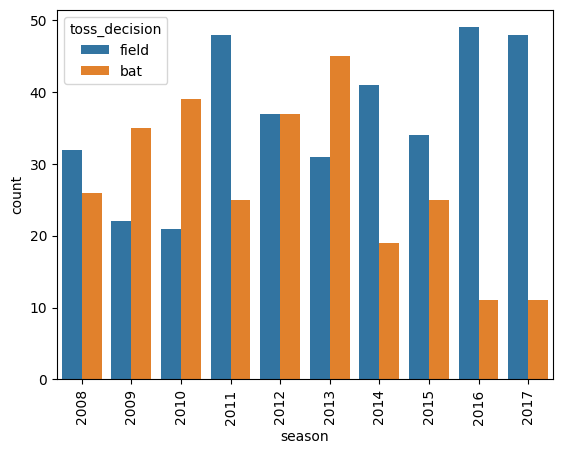

In [22]:
sns.countplot(data=matches, x='season', hue='toss_decision')
plt.xticks(rotation=90)
plt.show()


In [23]:
total = matches['team1'].value_counts() + matches['team2'].value_counts()
wins = matches['winner'].value_counts()

win_rate = (wins / total * 100).sort_values(ascending=False)

pd.DataFrame({'Matches': total, 'Wins': wins, 'Win Rate': win_rate})


,Matches,Wins,Win Rate
Chennai Super Kings,131,79,60.305344
Deccan Chargers,75,29,38.666667
Delhi Daredevils,147,62,42.176871
Gujarat Lions,30,13,43.333333
Kings XI Punjab,148,70,47.297297
Kochi Tuskers Kerala,14,6,42.857143
Kolkata Knight Riders,148,77,52.027027
Mumbai Indians,157,92,58.598726
Pune Warriors,46,12,26.086957
Rajasthan Royals,118,63,53.389831


In [24]:
matches['winner'].value_counts()


,count
winner,
Mumbai Indians,92
Chennai Super Kings,79
Kolkata Knight Riders,77
Royal Challengers Bangalore,73
Kings XI Punjab,70
Rajasthan Royals,63
Delhi Daredevils,62
Sunrisers Hyderabad,42
Deccan Chargers,29


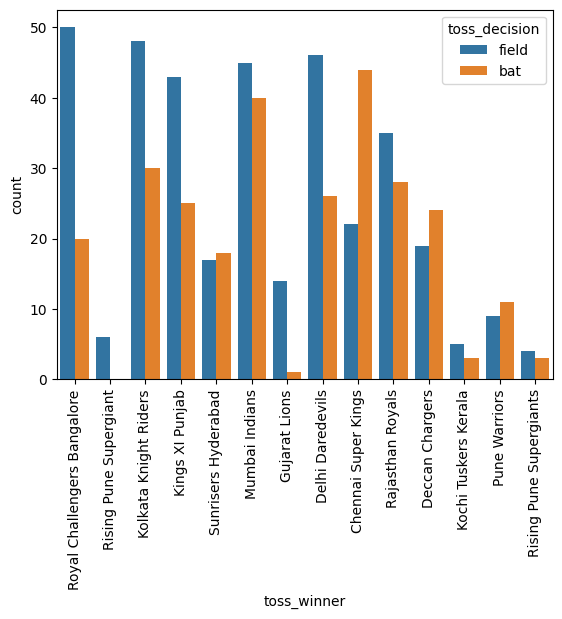

In [25]:
sns.countplot(data=matches, x='toss_winner', hue='toss_decision')
plt.xticks(rotation=90)
plt.show()


In [26]:
matches['winner'].value_counts().head(5)


,count
winner,
Mumbai Indians,92
Chennai Super Kings,79
Kolkata Knight Riders,77
Royal Challengers Bangalore,73
Kings XI Punjab,70
